# Importing Libraries

In [ ]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#warnings
import warnings
warnings.filterwarnings("ignore")

# Loading the Data

In [ ]:
dataset = pd.read_csv("/kaggle/input/fraud-dataset/Fraud.csv")

In [ ]:
dataset

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [ ]:
# Checking the data types

dataset.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
# Missing Data Percentage 

round(dataset.isnull().sum()/dataset.shape[0], 2)

step              0.0
type              0.0
amount            0.0
nameOrig          0.0
oldbalanceOrg     0.0
newbalanceOrig    0.0
nameDest          0.0
oldbalanceDest    0.0
newbalanceDest    0.0
isFraud           0.0
isFlaggedFraud    0.0
dtype: float64

In [ ]:
dataset['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

#As we can see that type colum consists of object type data, lets convert that into int type.

In [ ]:
type_map = {'PAYMENT':1, 'TRANSFER':2, 'CASH_OUT':3, 'DEBIT':4, 'CASH_IN':5}

dataset.loc[:,'payment type'] = dataset['type'].apply(lambda x: type_map[x])
dataset = dataset.drop('type',axis=1)
dataset

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,payment type
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,1
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,1
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,2
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,3
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,3
6362616,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,2
6362617,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,3
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,2


# Feature analysis

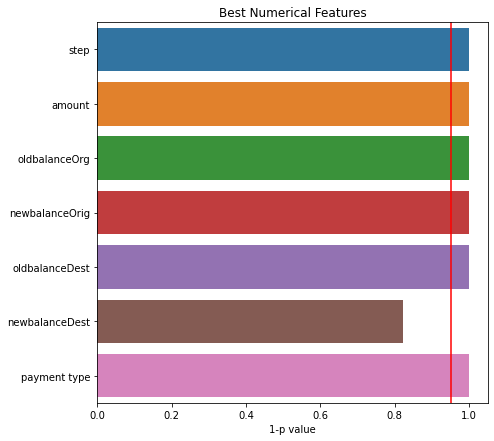

In [ ]:
numerical = ['step', 'amount','oldbalanceOrg', 'newbalanceOrig','oldbalanceDest', 'newbalanceDest','payment type']

# Checking the best numerical features for statistical description.

p=[]
from scipy.stats import ttest_ind

for i in numerical:
    df1=dataset.groupby('isFraud').get_group(0)
    df2=dataset.groupby('isFraud').get_group(1)
    t,pvalue=ttest_ind(df1[i],df2[i])
    p.append(1-pvalue)
plt.figure(figsize=(7,7))
sns.barplot(x=p, y=numerical)
plt.title('Best Numerical Features')
plt.axvline(x=(1-0.05),color='r')
plt.xlabel('1-p value')
plt.show()

For visual purpose, I redid the graph to show acceptance of 'Alternative Hypothesis' for T Test. So, the ones crossing the red lines show statistical significance.

In [ ]:
# Checking the std for both non defaulter and defaulter.

for i in numerical:
    df1=dataset.groupby('isFraud').get_group(0)
    df2=dataset.groupby('isFraud').get_group(1)
    print(np.std(df1[i],ddof=1),np.std(df2[i],ddof=1))

142.14019449219748 216.38869034044959
596236.9813471774 2404252.947240169
2887144.030332925 3547719.4391091294
2924986.964649587 1965666.4557191336
3399201.793378541 3336420.9509249544
3673815.7099226634 3908816.5338157555
1.4921957048818997 0.5000291042824477


The above observations are Standard Deviations of Columns (i.e., Defaulters vs Non-defaulters). T Test for independence runs on the assumption that samples under observations should have equal Standard Deviations. Although the difference observed above seems less, it still doesn't seem acceptable. Hence, we'll go with a non-parametric test.

We'll use SelectKBest library to narrow down choices of features. This will make use of Annova test.

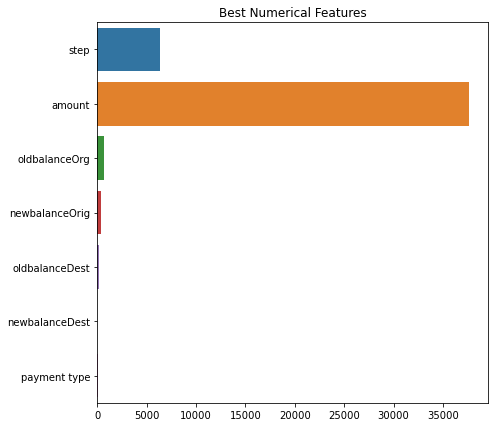

In [ ]:
from sklearn.feature_selection import SelectKBest,f_classif
n = SelectKBest(score_func=f_classif, k='all')
numcols=n.fit(dataset[numerical],dataset['isFraud'])
plt.figure(figsize=(7,7))
sns.barplot(x=numcols.scores_,y=numerical)
plt.title('Best Numerical Features')
plt.show()

The graph shows that amount has highest significance and step has seconnd highest significance whereas payment type, newbalancedest and oldbalancedest are insignificant.

# Creating the dataframe to plot graphs to check outliers

In [ ]:
df = dataset[['step', 'amount','oldbalanceOrg', 'newbalanceOrig','oldbalanceDest', 'newbalanceDest','payment type']]

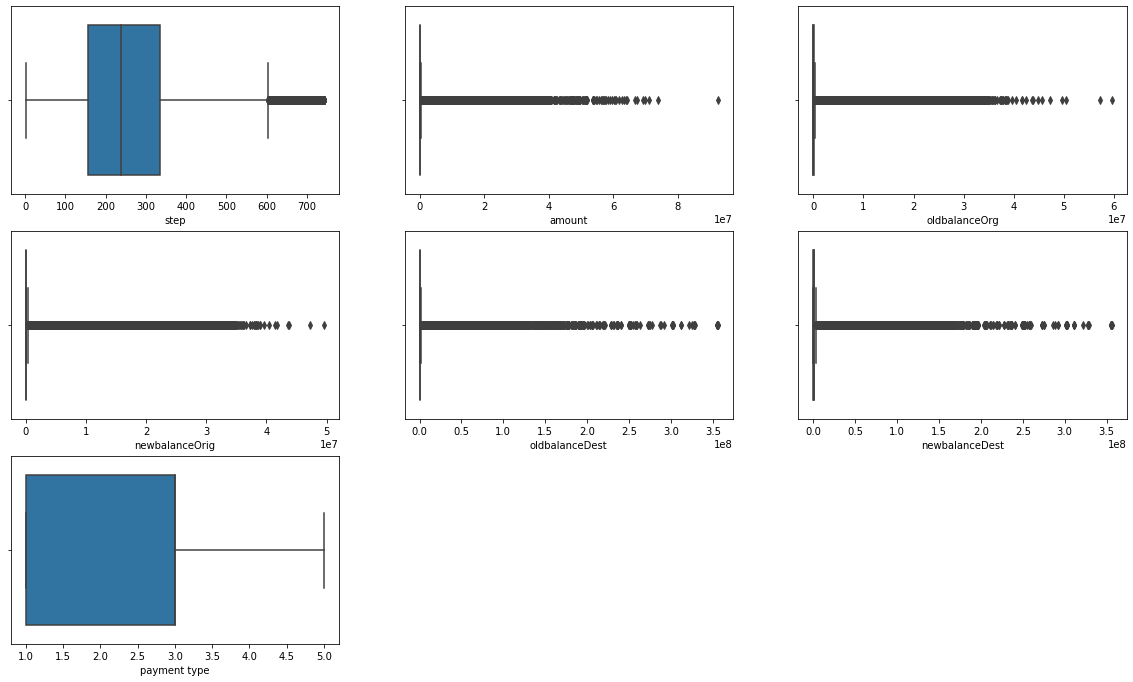

In [ ]:
# Plotting the Graph

plt.figure(figsize=(20,20))
x = 1
for column in df.columns:
    if x<=11:
        plt.subplot(5,3,x)
        sns.boxplot(df[column])
    x+=1
plt.show()

In [ ]:
dataset = dataset[dataset['amount']<70000000]
dataset = dataset[dataset['oldbalanceOrg']<50000000]
dataset = dataset[dataset['newbalanceOrig']<45000000]
dataset = dataset[dataset['oldbalanceDest']<340000000]
dataset = dataset[dataset['newbalanceDest']<350000000]

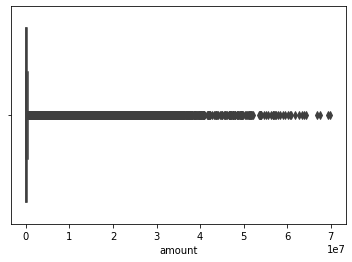

In [ ]:
#Box plot for amount
sns.boxplot(dataset['amount'])
plt.show()

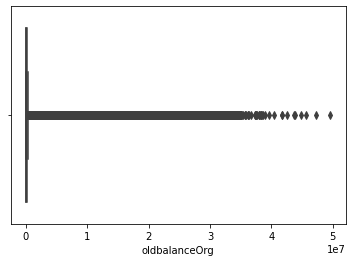

In [ ]:
#Box plot for oldbalanceOrg
sns.boxplot(dataset['oldbalanceOrg'])
plt.show()

In [ ]:
# Removing more outliers
dataset = dataset[dataset['oldbalanceOrg']<45000000]

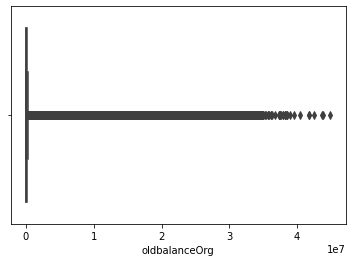

In [ ]:
#Box plot for oldbalanceOrg
sns.boxplot(dataset['oldbalanceOrg'])
plt.show()

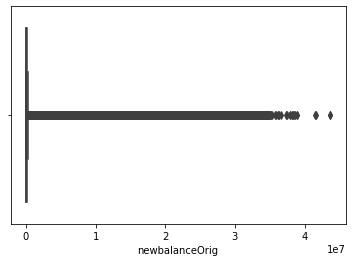

In [ ]:
#Box plot for newbalanceOrig
sns.boxplot(dataset['newbalanceOrig'])
plt.show()

In [ ]:
# Removing more outliers
dataset = dataset[dataset['newbalanceOrig']<40000000]

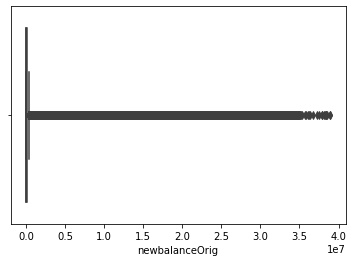

In [ ]:
#Box plot for newbalanceOrig
sns.boxplot(dataset['newbalanceOrig'])
plt.show()

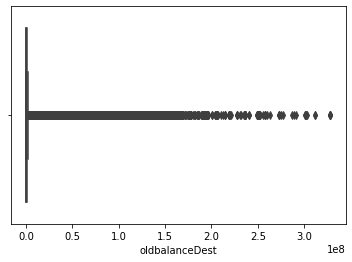

In [ ]:
#Box plot for oldbalanceDest
sns.boxplot(dataset['oldbalanceDest'])
plt.show()

In [ ]:
# Removing more outliers
dataset = dataset[dataset['oldbalanceDest']<300000000]

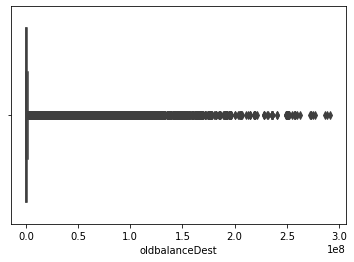

In [ ]:
#Box plot for oldbalanceDest
sns.boxplot(dataset['oldbalanceDest'])
plt.show()

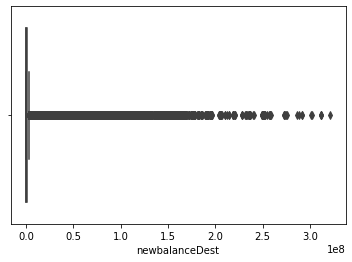

In [ ]:
#Box plot for newbalanceDest
sns.boxplot(dataset['newbalanceDest'])
plt.show()

In [ ]:
# Removing more outliers
dataset = dataset[dataset['newbalanceDest']<350000000]

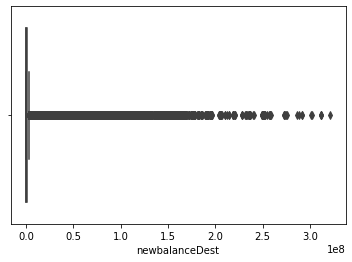

In [ ]:
#Box plot for newbalanceDest
sns.boxplot(dataset['newbalanceDest'])
plt.show()

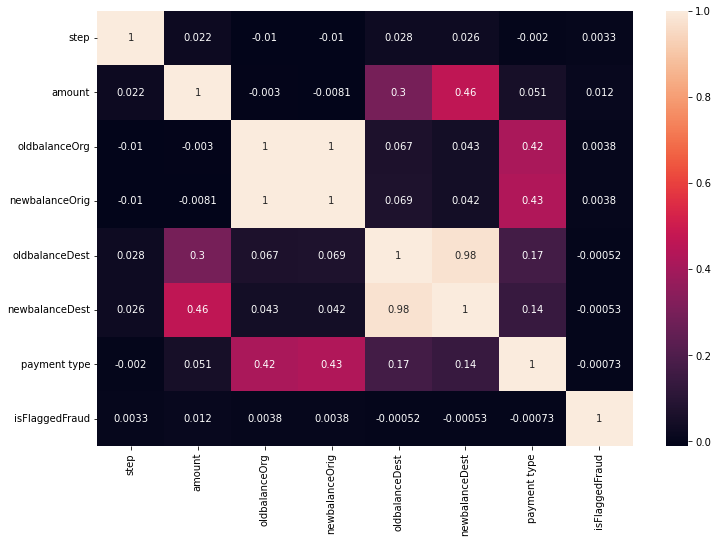

In [ ]:
# Plotting correlated Heat Map

plt.figure(figsize=(12,8))
sns.heatmap(dataset[['step', 'amount','oldbalanceOrg', 'newbalanceOrig',
               'oldbalanceDest', 'newbalanceDest','payment type',
               'isFlaggedFraud']].corr(),annot=True)
plt.show()

There is a correlation of 1 between newbalanceOrig and oldbalanceOrg and correlation of 9.8 between oldbalanceDest and newbalanceDest. Hence removing the oldbalanceOrg and oldbalanceDest after comparing the feature importances.

In [ ]:
dataset = dataset.drop(['oldbalanceOrg','oldbalanceDest'],axis=1)
dataset

,step,amount,nameOrig,newbalanceOrig,nameDest,newbalanceDest,isFraud,isFlaggedFraud,payment type
0,1,9839.64,C1231006815,160296.36,M1979787155,0.00,0,0,1
1,1,1864.28,C1666544295,19384.72,M2044282225,0.00,0,0,1
2,1,181.00,C1305486145,0.00,C553264065,0.00,1,0,2
3,1,181.00,C840083671,0.00,C38997010,0.00,1,0,3
4,1,11668.14,C2048537720,29885.86,M1230701703,0.00,0,0,1
...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,0.00,C776919290,339682.13,1,0,3
6362616,743,6311409.28,C1529008245,0.00,C1881841831,0.00,1,0,2
6362617,743,6311409.28,C1162922333,0.00,C1365125890,6379898.11,1,0,3
6362618,743,850002.52,C1685995037,0.00,C2080388513,0.00,1,0,2


# Dividing the dataset into dependent and independent variables.

#### Independent variables

In [ ]:
X = dataset.drop(['nameOrig','nameDest','isFraud','isFlaggedFraud'],axis = 1)
X

,step,amount,newbalanceOrig,newbalanceDest,payment type
0,1,9839.64,160296.36,0.00,1
1,1,1864.28,19384.72,0.00,1
2,1,181.00,0.00,0.00,2
3,1,181.00,0.00,0.00,3
4,1,11668.14,29885.86,0.00,1
...,...,...,...,...,...
6362615,743,339682.13,0.00,339682.13,3
6362616,743,6311409.28,0.00,0.00,2
6362617,743,6311409.28,0.00,6379898.11,3
6362618,743,850002.52,0.00,0.00,2


#### Dependent variable

In [ ]:
y = dataset['isFraud']
y

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362588, dtype: int64

# Scaling the data

In [ ]:
# Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Train Test split

####  Splitting the data into train, test and validation
#### Used 70-30 split for train and test data

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=120)

# Model creation

### Creating Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train,y_train)

y_test_pred = lg_model.predict(X_test)

In [ ]:
y_test_prob = lg_model.predict_proba(X_test)

##### AUC Score for test

In [ ]:
from sklearn.metrics import confusion_matrix,roc_auc_score,log_loss,roc_curve,accuracy_score

In [ ]:
print('The train AUC score is:',roc_auc_score(y_test,y_test_prob[:,1]))

The train AUC score is: 0.8279622828510923


#### Plotting the AUC curve

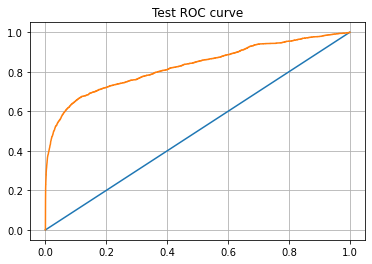

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:,1])
plt.plot(fpr,fpr)
plt.plot(fpr,tpr)
plt.grid()
plt.title('Test ROC curve')
plt.show()

#### Getting Confusion Matrix and ploting it.

In [ ]:
confusion_matrix(y_test,y_test_pred)

array([[1906245,     144],
       [   2204,     184]])

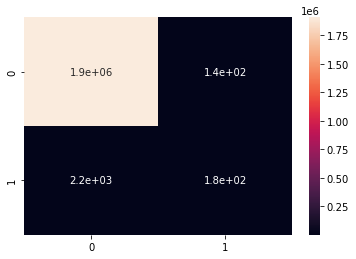

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True)
plt.show()

#### Getting Classification Report

In [ ]:
from sklearn.metrics import classification_report
print('Test Classification Report\n')
print(classification_report(y_test,y_test_pred))

Test Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906389
           1       0.56      0.08      0.14      2388

    accuracy                           1.00   1908777
   macro avg       0.78      0.54      0.57   1908777
weighted avg       1.00      1.00      1.00   1908777



#### For 1s the f1 score is really low and this happens due to imbalance data

#### Before computing the binary log loss, we need to perform caliberation

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
model_isotonic = CalibratedClassifierCV(lg_model, cv=3, method='isotonic')
model_isotonic.fit(X_train,y_train)

CalibratedClassifierCV(base_estimator=LogisticRegression(), cv=3,
                       method='isotonic')

In [ ]:
isotonic_predict_prob_test = model_isotonic.predict_proba(X_test)

In [ ]:
log_loss(y_test,isotonic_predict_prob_test)

0.007359032989460836

# SMOTE

##### Applying SMOTE to deal with data imbalance

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_sm,y_sm = smote.fit_resample(X,y)
X_sm.shape,y_sm.shape

((12708762, 5), (12708762,))

# Train Test split after resampling

In [ ]:
X_train_sm,X_test_sm,y_train_sm,y_test_sm = train_test_split(X_sm,y_sm,test_size=0.3,random_state=120)

# Model creation

In [ ]:
# Creating Logistic Regression Model
lg_model_sm = LogisticRegression()
lg_model_sm = lg_model_sm.fit(X_train_sm,y_train_sm)

y_test_sm_pred = lg_model_sm.predict(X_test_sm)

In [ ]:
y_test_prob_sm = lg_model_sm.predict_proba(X_test_sm)

In [ ]:
# Getting AUC score
print('The train AUC score is:',roc_auc_score(y_test_sm,y_test_prob_sm[:,1]))

The train AUC score is: 0.8530882086893212


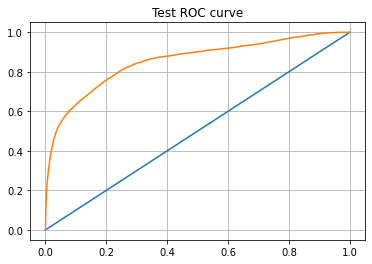

In [ ]:
# Plotting the AUC curve

fpr, tpr, thresholds = roc_curve(y_test_sm, y_test_prob_sm[:,1])
plt.plot(fpr,fpr)
plt.plot(fpr,tpr)
plt.grid()
plt.title('Test ROC curve')
plt.show()

In [ ]:
#Getting Confusion Matrix

confusion_matrix(y_test_sm,y_test_sm_pred)

array([[ 901001, 1005928],
       [ 174576, 1731124]])

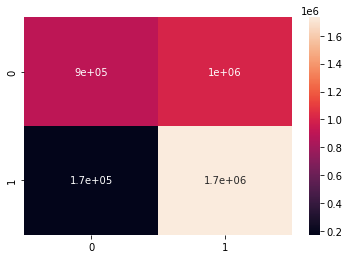

In [ ]:
# Plotting Confussion Matrix

sns.heatmap(confusion_matrix(y_test_sm,y_test_sm_pred),annot=True)
plt.show()

In [ ]:
# getting Classification Report

from sklearn.metrics import classification_report
print('Test Classification Report\n')
print(classification_report(y_test_sm,y_test_sm_pred))

Test Classification Report

              precision    recall  f1-score   support

           0       0.84      0.47      0.60   1906929
           1       0.63      0.91      0.75   1905700

    accuracy                           0.69   3812629
   macro avg       0.74      0.69      0.67   3812629
weighted avg       0.74      0.69      0.67   3812629



*From* Classification Report, we can say that f1 score for 1s has increased but the accuracy of the model is 69% which is good for a prediction model.

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
model_isotonic = CalibratedClassifierCV(lg_model1, cv=3, method='isotonic')
model_isotonic.fit(X_train_sm,y_train_sm)

CalibratedClassifierCV(base_estimator=LogisticRegression(random_state=42,
                                                         solver='liblinear'),
                       cv=3, method='isotonic')

In [ ]:
isotonic_predict_prob_test = model_isotonic.predict_proba(X_test_sm)

In [ ]:
log_loss(y_test_sm,isotonic_predict_prob_test)

0.4601604892579215

As we can see that the log loss value for the model is .46 and which is average value for binary log loss as we expect low value of log loss for good prediction model.

So we can conclude that out model after applying SMOTE on the data is providing better accuracy in prediction as from confusion matrix in the above we can see that we have better f1 score than the first matrix before applying SMOTE but still as a prediction model we prefer better accuracy than what we are getting from our model. For that we need better balanced data to create a better model.